## Update a 2D Delft3D FM model: mesh refinements

Once you have a **Delft3D FM** model, you may want to update your model in order to use a new data map, change a parameter value, add structures or cross-sections data, use different boundary data, create and run different scenarios etc.

With HydroMT, you can easily read your model and update one or several components of your model using the **update** function of the command line interface (CLI). Here are the steps and some examples on how to **refine the mesh 2D grid** for an existing 1D2D model.

All lines in this notebook which starts with ! are executed from the command line. Within the notebook environment the logging messages are shown after completion. You can also copy these lines and paste them in your shell to get more feedback.

### Model setup configuration

Updating a bedlevel or infiltration capacity map is an easy step with the command line but sometimes, for example with forcing or grid refinement, you need to update several things at the same time. This is possible by preparing a **configuration file** that includes every methods and settings that you want to do during your update.

The configuration-file contains the model setup configuration and determines which methods are updated and in which sequence and sets optional arguments for each method. This configuration is passed to hydromt using `-i <path_to_ini_file>`. The supported format are either YAML or INI.

Each section, before indent, (e.g. setup_mesh2d_refine) corresponds with a model method which are explained in the [docs (model methods)](https://deltares.github.io/hydromt_delft3dfm/latest/user_guide/dflowfm_model_setup.html).

Let's open the example configuration file **dflowfm_update_mesh2d_refine.yml** from the model repository [examples folder] and have a look at the settings.

In [5]:
fn_yml = "dflowfm_update_mesh2d_refine.yml"
with open(fn_yml, "r") as f:
    txt = f.read()
print(txt)

global:
  crs: 3857

setup_mesh2d_refine:
  polygon_fn: ./data/refine.geojson
  steps: 2

setup_link1d2d:
  link_direction: 1d_to_2d


Here we can see that to fully refine the 2D grid, we will run two methods:

- [global](https://deltares.github.io/hydromt_delft3dfm/latest/_generated/hydromt_delft3dfm.DFlowFMModel.html#hydromt_delft3dfm.DFlowFMModel): our model to update is defined in the projected CRS WGS84 EPSG 3857. Unfortunately Delft3D FM do not allow yet to store the model CRS information, and the CRS of the model to update needs to be passed to HydroMT again.
- [setup_mesh2d_refine](https://deltares.github.io/hydromt_delft3dfm/latest/_generated/hydromt_delft3dfm.DFlowFMModel.setup_mesh2d_refine.html): we will refine our 2D mesh within the polygons defined in the file *data/refine.geojson* with 2 steps or iterations.
- [setup_link1d2d](https://deltares.github.io/hydromt_delft3dfm/latest/_generated/hydromt_delft3dfm.DFlowFMModel.setup_link1d2d.html): in the model we would like to update, 1D elements are present. Because we will udpate the 2D mesh with our refinements, we need to update and re-create the 1D2D links so that they match the newly refined 2D grid.

You can find more information on the different methods and their options in the [docs (model methods)](https://deltares.github.io/hydromt_delft3dfm/latest/user_guide/dflowfm_model_setup.html).

> **NOTE**: to provide data to HydroMT, you can either provide a data catalog entry, a direct path to a file (provided reading that file is straightforward and no pre-processing is required) or for python users. We use a direct path in `setup_mesh2d_refine` for the refine polygon. 

> **NOTE**: Refinment of the 2D grid leads to a new grid definition. There fore the `setup_link1d2d` is called again.

### HydroMT CLI update interface

Using the **HydroMT build** API, we can update one or several components of an already existing Delft3D FM model. Let's get an overview of the available options:

In [4]:
# Print the options available from the update command
! hydromt update --help

Traceback (most recent call last):
  File "C:\Users\li_xn\AppData\Local\anaconda3\envs\hydromt-delft3dfm\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\li_xn\AppData\Local\anaconda3\envs\hydromt-delft3dfm\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\li_xn\AppData\Local\anaconda3\envs\hydromt-delft3dfm\Scripts\hydromt.exe\__main__.py", line 4, in <module>
  File "C:\Users\li_xn\AppData\Roaming\Python\Python39\site-packages\hydromt\__init__.py", line 17, in <module>
    from . import cli, flw, raster, stats, vector, workflows
  File "C:\Users\li_xn\AppData\Roaming\Python\Python39\site-packages\hydromt\raster.py", line 22, in <module>
    import mercantile as mct
ModuleNotFoundError: No module named 'mercantile'


### Update a 1D2D Delft3D FM model to refine the 2D mesh

In [2]:
# NOTE: copy this line (without !) to your shell for more direct feedback
! hydromt update dflowfm dflowfm_piave -o ./build/dflowfm_mesh2d_refine -i dflowfm_update_mesh2d_refine.yml -v

2023-10-17 16:07:42,716 - update - log - INFO - HydroMT version: 0.8.1.dev0
2023-10-17 16:07:42,716 - update - main - INFO - Updating dflowfm model at C:\Developments\hydromt_delft3dfm\examples\dflowfm_piave (r).
2023-10-17 16:07:42,716 - update - main - INFO - Output dir: C:\Developments\hydromt_delft3dfm\examples\build\dflowfm_mesh2d_refine
2023-10-17 16:07:42,716 - update - main - INFO - User settings:
2023-10-17 16:07:43,796 - update - model_api - INFO - Initializing dflowfm model from hydromt_delft3dfm (v0.1.1).
2023-10-17 16:07:43,796 - update - data_catalog - INFO - Parsing data catalog from C:\Developments\hydromt_delft3dfm\hydromt_delft3dfm\data\parameters_data.yml
2023-10-17 16:07:43,811 - update - dflowfm - INFO - Reading mdu file at C:\Developments\hydromt_delft3dfm\examples\dflowfm_piave\dflowfm\DFlowFM.mdu
2023-10-17 16:07:44,618 - update - dflowfm - INFO - project crs: 3857
2023-10-17 16:07:44,618 - update - dflowfm - INFO - Reading model data from C:\Developments\hydrom

The example above means the following: run **hydromt** with:

- `update dflowfm`: i.e. update a dflowfm model
- `dflowfm_piave`: original model folder
- `-o ./build/dflowfm_mesh2d_refine`: output updated model folder
- `-i dflowfm_update_mesh2d_refine.yml`: setup configuration file containing the components to update and their different options
- `v`: give some extra verbosity (2 * v) to display feedback on screen. Now debug messages are provided.


### Model comparison

From the information above, you can see that the mesh2d was refined and now contains 828 faces after refinement compared to 460 beforehand and that the 1D2D links have been regenerated.

Using the script from the [plot example](https://deltares.github.io/hydromt_wflow/latest/_examples/plot_dflowfm_mesh.html), we can compare the 2D mesh before and after the refinements.

First, let's load some packages. 

In [1]:
import xugrid as xu
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# Load both models with hydromt
from hydromt_delft3dfm import DFlowFMModel

mod0 = DFlowFMModel(root="dflowfm_piave", mode="r", crs=3857)
mod1 = DFlowFMModel(root="build/dflowfm_mesh2d_refine", mode="r", crs=3857)

# read dflowfm mesh; extract the 2d grid part
mesh2d_0 = mod0.mesh_grids["mesh2d"]
mesh2d_1 = mod1.mesh_grids["mesh2d"]

In [3]:
# read the polygon file we used for the refinement
polygons = gpd.read_file("data/refine.geojson")

<Axes: title={'center': 'Refined mesh'}>

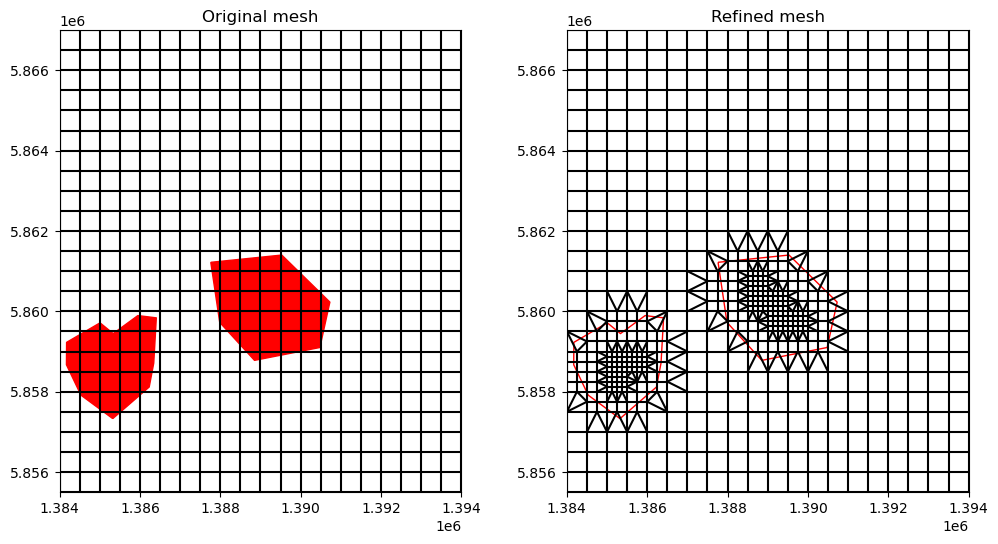

In [4]:
# Make 2 side-by-side plots to plot each mesh
zoom_level = 10
fig = plt.figure(figsize=(12, 6))
axs = fig.subplots(1, 2)

axs[0].set_title("Original mesh")
axs[1].set_title("Refined mesh")

# Plot the original mesh
mesh2d_0.plot(ax=axs[0], facecolor="none", edgecolor="k")
polygons.to_crs(mod0.crs).plot(ax=axs[0], facecolor="r", edgecolor="r")

# Plot the refined mesh
mesh2d_1.plot(ax=axs[1], facecolor="none", edgecolor="k")
polygons.to_crs(mod0.crs).plot(ax=axs[1], facecolor="none", edgecolor="r")
